In [61]:
import geopandas as gpd
import pandas as pd
import parquet

In [62]:
quadrangles = gpd.read_file("raw_data/7.5_Minute_Quadrangle_Boundaries-shp")
quadrangles.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         1962 non-null   int64   
 1   AREA        1962 non-null   float64 
 2   PERIMETER   1962 non-null   float64 
 3   QUADGRID_   1962 non-null   int64   
 4   QUADGRID_I  1962 non-null   int64   
 5   QUAD        1962 non-null   int64   
 6   NAME        1962 non-null   object  
 7   TILE_NAME   1962 non-null   object  
 8   LOCATION    1962 non-null   object  
 9   LATLONG_ID  1931 non-null   object  
 10  SHAPE_Leng  1962 non-null   float64 
 11  SHAPE_Area  1962 non-null   float64 
 12  geometry    1962 non-null   geometry
dtypes: float64(4), geometry(1), int64(4), object(4)
memory usage: 199.4+ KB


In [63]:
leases = gpd.read_file("raw_data/ASLD_-_State_Trust_Parcels/ASLD_-_State_Trust_Parcels.shp")
leases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    23116 non-null  int64   
 1   landnum     23116 non-null  object  
 2   County      23116 non-null  object  
 3   parcel      23116 non-null  int64   
 4   fundtxt     23116 non-null  object  
 5   open_code   23116 non-null  int64   
 6   leased      23116 non-null  object  
 7   ke          23116 non-null  object  
 8   lease_      23116 non-null  int64   
 9   lse_code    23116 non-null  int64   
 10  lse_seq     23116 non-null  int64   
 11  effdate     19929 non-null  object  
 12  expdate     19929 non-null  object  
 13  perpetual   0 non-null      float64 
 14  aus         23116 non-null  float64 
 15  rolodex_    23116 non-null  int64   
 16  full_name   19929 non-null  object  
 17  trs         23116 non-null  object  
 18  legal       23103 non-null  object  
 

<Axes: >

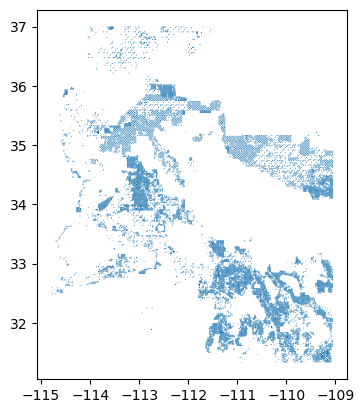

In [64]:
leases.plot()

<Axes: >

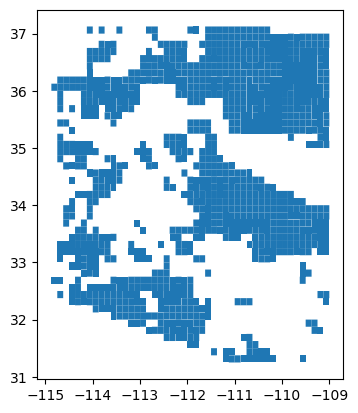

In [65]:
#First we find all quadrangles that overlap with a lease
outside_quadrangles = gpd.sjoin(left_df=quadrangles, right_df=leases, how='left', predicate="overlaps")
#Next we keep only the quadrangles that did not overlap
outside_quadrangles = outside_quadrangles[outside_quadrangles['landnum'].isna()]
outside_quadrangles = outside_quadrangles[quadrangles.keys()]
outside_quadrangles.plot()

In [66]:
outside_quadrangles = outside_quadrangles.to_crs(crs=3857)
leases = leases.to_crs(crs=3857)

In [81]:
leases_with_nearest_quadrangle = gpd.sjoin_nearest(left_df=outside_quadrangles, right_df=leases, how='right')
leases_with_nearest_quadrangle.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 23117 entries, 0 to 23115
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index_left  23117 non-null  int64   
 1   FID         23117 non-null  int64   
 2   AREA        23117 non-null  float64 
 3   PERIMETER   23117 non-null  float64 
 4   QUADGRID_   23117 non-null  int64   
 5   QUADGRID_I  23117 non-null  int64   
 6   QUAD        23117 non-null  int64   
 7   NAME        23117 non-null  object  
 8   TILE_NAME   23117 non-null  object  
 9   LOCATION    23117 non-null  object  
 10  LATLONG_ID  23023 non-null  object  
 11  SHAPE_Leng  23117 non-null  float64 
 12  SHAPE_Area  23117 non-null  float64 
 13  OBJECTID    23117 non-null  int64   
 14  landnum     23117 non-null  object  
 15  County      23117 non-null  object  
 16  parcel      23117 non-null  int64   
 17  fundtxt     23117 non-null  object  
 18  open_code   23117 non-null  int64   
 19  l

<Axes: >

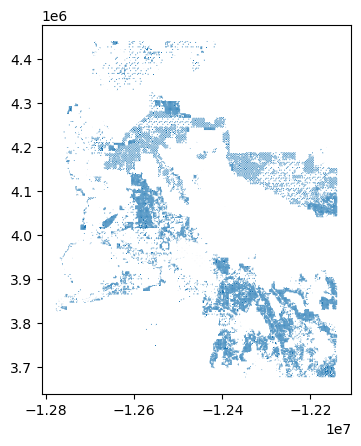

In [80]:
leases_with_nearest_quadrangle.plot()

<Axes: >

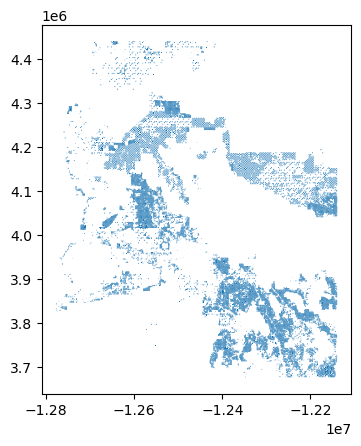

In [69]:
leases.plot()